# ***Computer Vision, CA2***

* Alborz Mahmoudian, 810101514
* Kasra Kashani, 810101490

# First Section: Data Generation

In [ ]:
# import os
# import random
# import string
# from PIL import ImageFilter, ImageFont, ImageDraw, Image


# OUT_DIR = "Captcha"
# os.makedirs(OUT_DIR, exist_ok=True)


# WIDTH, HEIGHT = 200, 100
# N_SAMPLES = 10
# CHARS = string.ascii_lowercase + string.digits
# FONT_SIZE = 40


# font = ImageFont.truetype("arial.ttf", FONT_SIZE)

# def generate_captcha(text):
    
#     img = Image.new("RGB", (WIDTH, HEIGHT), (255, 255, 255))
#     draw = ImageDraw.Draw(img)

    
#     bbox = draw.textbbox((0, 0), text, font=font)
#     text_w = bbox[2] - bbox[0]
#     text_h = bbox[3] - bbox[1]
#     x = (WIDTH - text_w) // 2
#     y = (HEIGHT - text_h) // 2

    
#     draw.text((x, y), text, font=font, fill=(0, 0, 0))

   
#     text_mask = Image.new("L", (WIDTH, HEIGHT), 255)  
#     mask_draw = ImageDraw.Draw(text_mask)
#     mask_draw.text((x, y), text, font=font, fill=0)

#     return img


# for i in range(N_SAMPLES):
#     text = ''.join(random.choices(CHARS, k=3))
#     img = generate_captcha(text)
#     img.save(os.path.join(OUT_DIR, f"{text}_{i:02d}.png"))

# print(f"{N_SAMPLES} samples '{OUT_DIR}'")


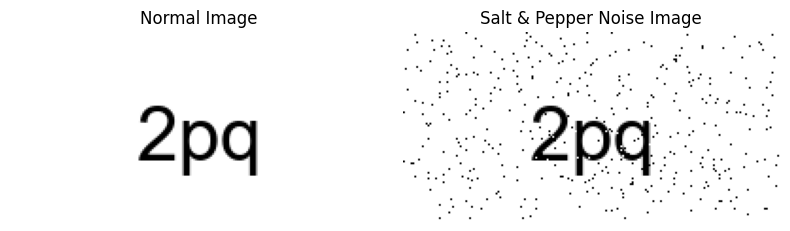

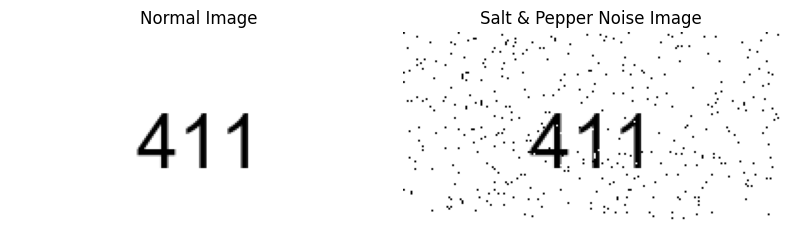

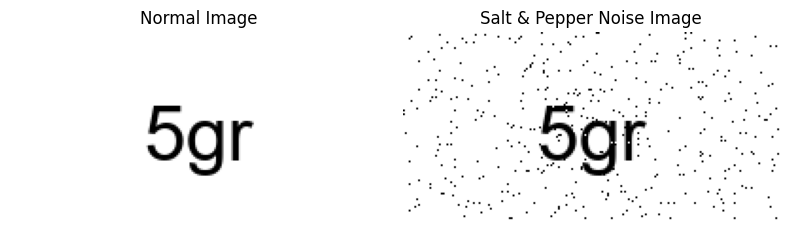

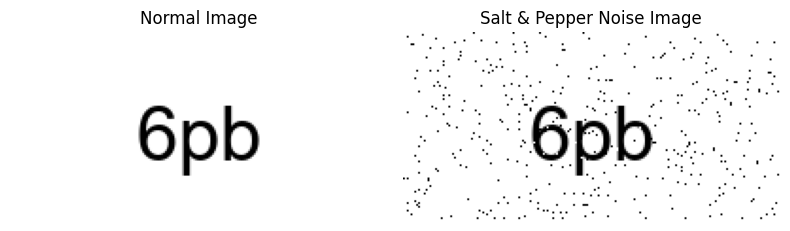

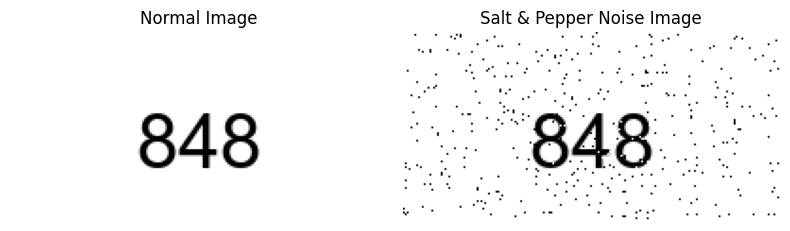

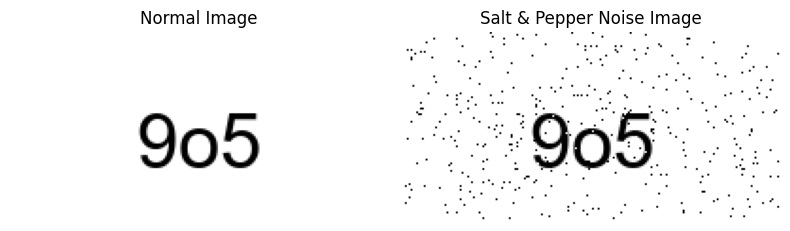

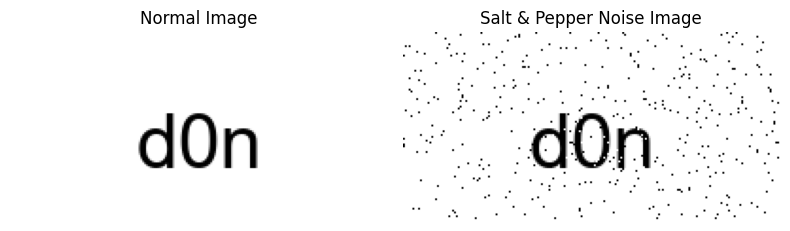

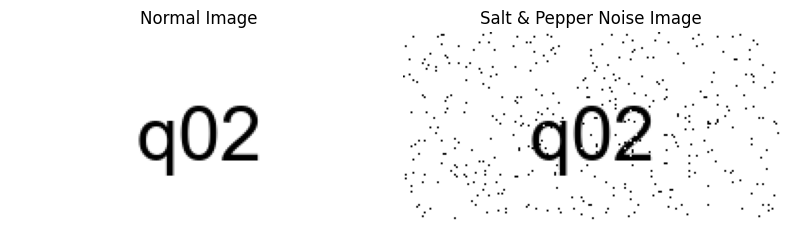

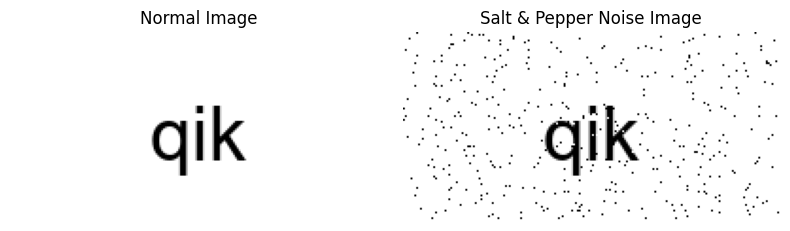

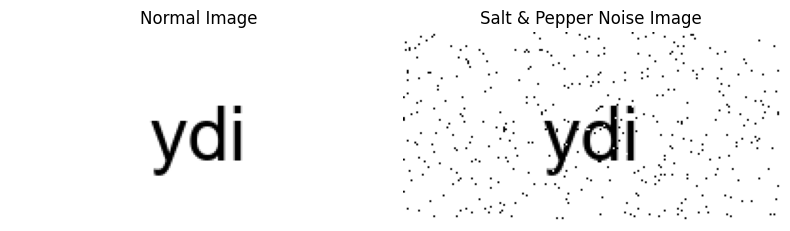

Noisy images saved in 'Captcha_noisy' folder.


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

INPUT_DIR = "Captcha"
OUTPUT_DIR = "Captcha_noisy"
os.makedirs(OUTPUT_DIR, exist_ok=True)

def add_salt_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02):
    noisy = np.copy(image)
    h, w, c = image.shape

    # Number of salt and pepper pixels
    num_salt = np.ceil(salt_prob * h * w)
    num_pepper = np.ceil(pepper_prob * h * w)

    # Add salt (white) pixels
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape[:2]]
    noisy[coords[0], coords[1], :] = 255

    # Add pepper (black) pixels
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape[:2]]
    noisy[coords[0], coords[1], :] = 0
    return noisy

for file in os.listdir(INPUT_DIR):
    if file.endswith(".png"):
        path = os.path.join(INPUT_DIR, file)
        img = cv2.imread(path)

        noisy_img = add_salt_pepper_noise(img)

        # Save the noisy image
        out_path = os.path.join(OUTPUT_DIR, file)
        cv2.imwrite(out_path, noisy_img)

        # Compare normal vs noisy images
        fig, axes = plt.subplots(1, 2, figsize=(8, 4))
        axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[0].set_title("Normal Image")
        axes[0].axis("off")

        axes[1].imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB))
        axes[1].set_title("Salt & Pepper Noise Image")
        axes[1].axis("off")

        plt.tight_layout()
        plt.show()

print(f"Noisy images saved in '{OUTPUT_DIR}' folder.")


<p dir='rtl' style='background:#fffbe6; font-family: Vazir; border:1px dashed #f0ad4e; padding:12px; border-radius:8px; color:#111'>
برای مات کردن (Blur) تصویر، از کرنل گوسی با اندازه (k = 5) و انحراف معیار (sigma = 1) استفاده کرده‌ایم. <br> این کرنل به دلیل خاصیت خود که به پیکسل‌های مرکزی وزن بیشتری می‌دهد و به پیکسل‌های دورتر وزن کمتری، می‌تواند اثر تاری ملایمی روی تصویر بگذارد. <br> در اینجا کرنل گوسی را به صورت دستی ایجاد کرده و آن را روی تصویر اعمال کرده‌ایم. <br> به طور معمول برای مات کردن تصاویر می‌توان از کرنل‌های میانگین یا میانه نیز استفاده کرد، اما این دو روش مشکلات خاص خود را دارند. <br> در کرنل میانگین، هر پیکسل با میانگین مقادیر پیکسل‌های همسایه‌اش جایگزین می‌شود که این کار باعث می‌شود مرزهای بین حروف نزدیک به هم، تیره‌تر شود. <br> این اتفاق می‌تواند باعث شود که حروفی که در کنار هم هستند به هم بچسبند و در مرحله بخش‌بندی (Segmentation) الگوریتم کانتورینگ آنها را به عنوان یک بخش واحد شناسایی کند. <br> همینطور در کرنل میانه نیز با محاسبه میانه مقادیر پیکسل‌های همسایه، همین مشکل رخ می‌دهد زیرا نقاط تیره یا روشن در اطراف پیکسل مرکزی می‌توانند باعث تغییرات ناخواسته در مرزهای حروف شوند. <br> بنابراین استفاده از کرنل گوسی با وزن‌دهی بیشتر به پیکسل‌های مرکزی باعث می‌شود که مرزهای حروف حفظ شود و مات‌سازی به‌طور ملایم‌تری انجام گیرد. <br> این روش از چسبیدن حروف به یکدیگر جلوگیری کرده و باعث می‌شود که در مرحله بخش‌بندی، الگوریتم بتواند هر حرف را به‌طور مجزا شناسایی کند. <br> 

</p>

$$
\frac{1}{273} \cdot \begin{bmatrix}
1 & 4 & 7 & 4 & 1 \\
4 & 16 & 26 & 16 & 4 \\
7 & 26 & 41 & 26 & 7 \\
4 & 16 & 26 & 16 & 4 \\
1 & 4 & 7 & 4 & 1
\end{bmatrix}
$$

[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


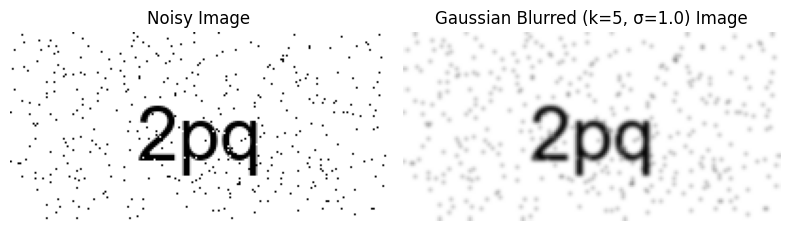

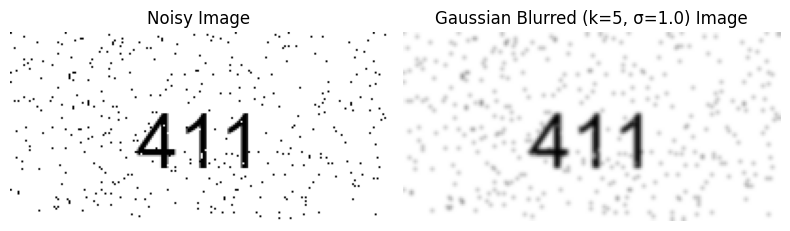

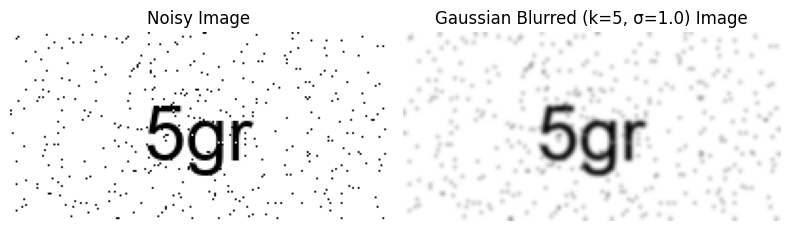

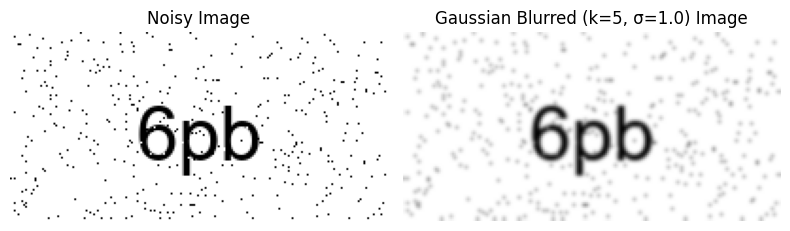

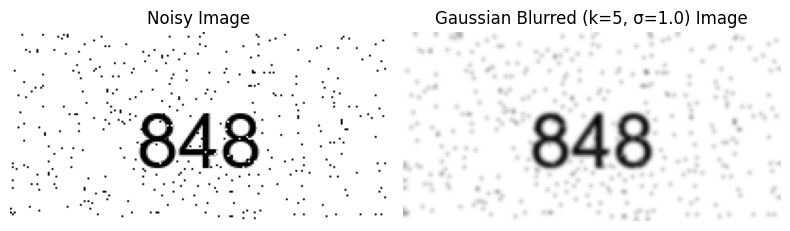

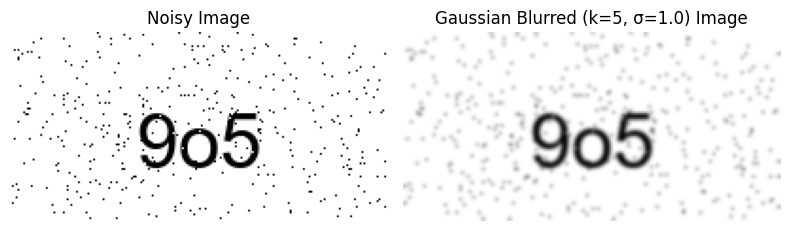

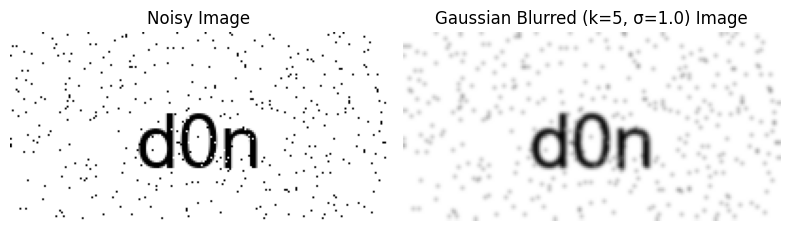

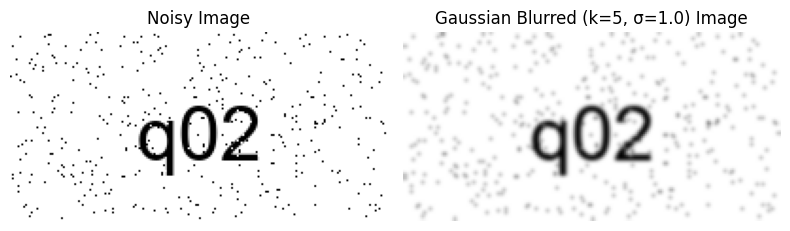

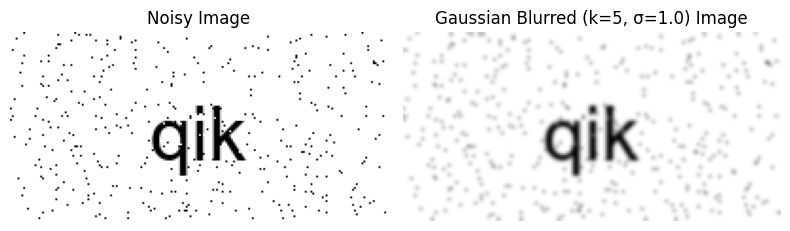

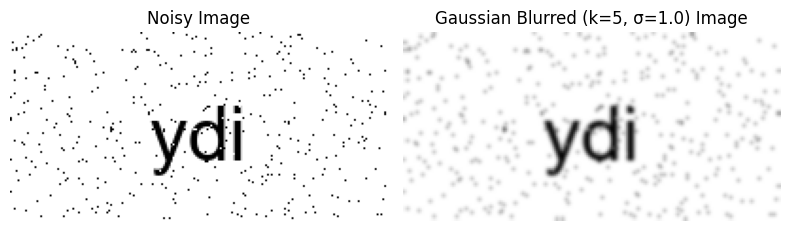

Gaussian blurred images saved in 'Captcha_blurred' folder.


In [3]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

INPUT_DIR = "Captcha_noisy"
OUTPUT_DIR = "Captcha_blurred"
os.makedirs(OUTPUT_DIR, exist_ok=True)

k = 5  # Gaussian kernel size
sigma = 1.0  # standard deviation of Gaussian blur

def gaussian_kernel(k, sigma):
    ax = np.linspace(-(k // 2), k // 2, k)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel = kernel / np.sum(kernel)  # Normalize the kernel
    return kernel

# Generate the kernel
kernel = gaussian_kernel(k, sigma)
print(kernel)

for file in os.listdir(INPUT_DIR):
    if file.endswith(".png"):
        path = os.path.join(INPUT_DIR, file)
        img = cv2.imread(path)

        # Apply the Gaussian kernel using filter2D
        blurred = cv2.filter2D(img, -1, kernel)

        # Save the blurred image
        out_path = os.path.join(OUTPUT_DIR, file)
        cv2.imwrite(out_path, blurred)

        # Compare noisy vs Gaussian Blurred 
        fig, axes = plt.subplots(1, 2, figsize=(8, 4))
        axes[0].imshow(img, cmap='gray')
        axes[0].set_title("Noisy Image")
        axes[0].axis("off")

        axes[1].imshow(blurred, cmap='gray')
        axes[1].set_title(f"Gaussian Blurred (k={k}, σ={sigma}) Image")
        axes[1].axis("off")
    
        plt.tight_layout()
        plt.show()

print(f"Gaussian blurred images saved in '{OUTPUT_DIR}' folder.")


[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


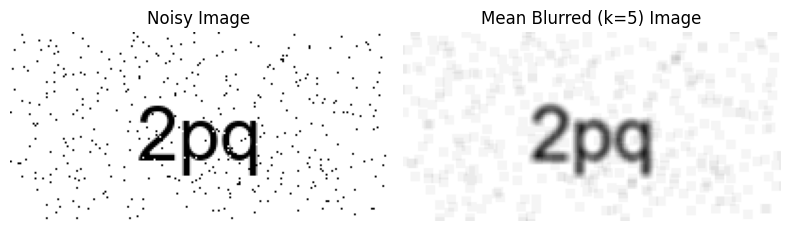

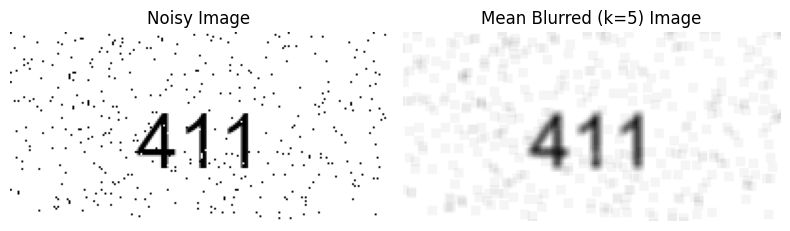

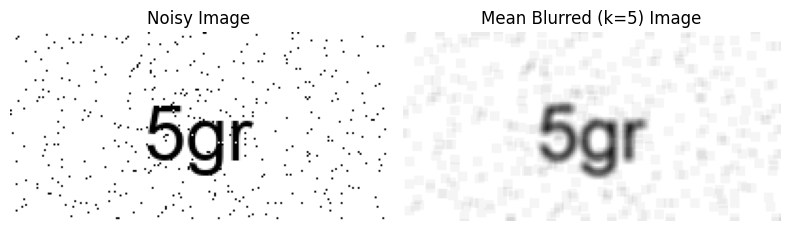

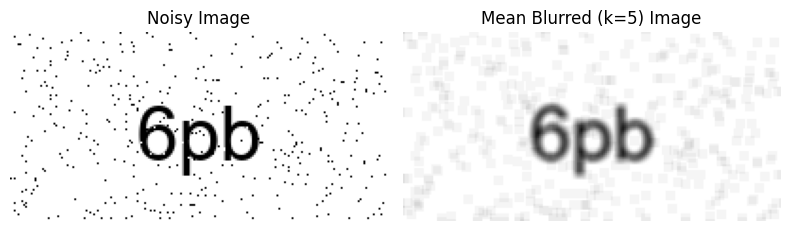

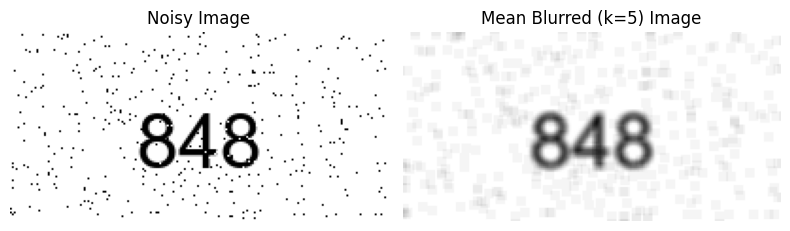

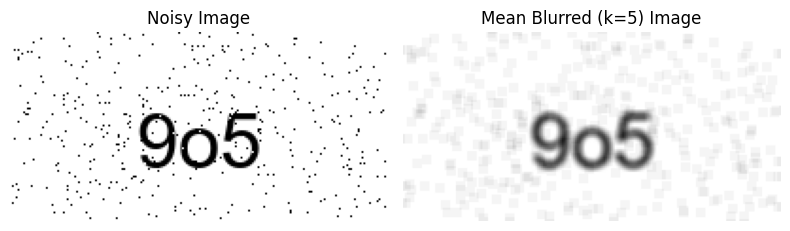

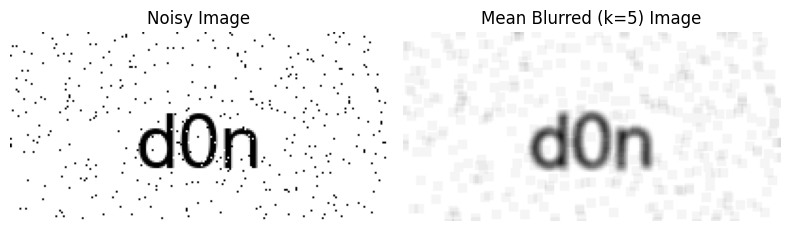

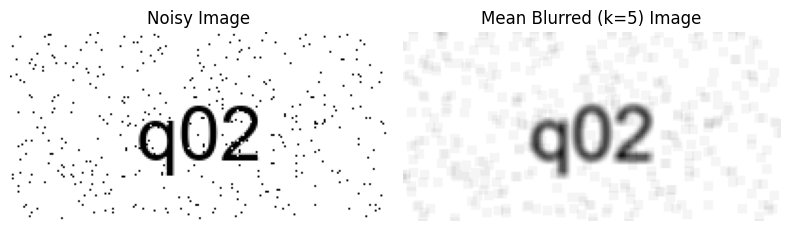

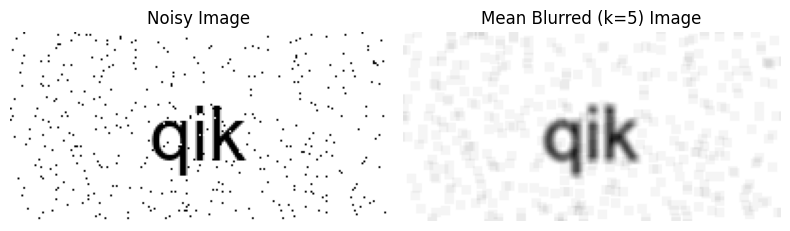

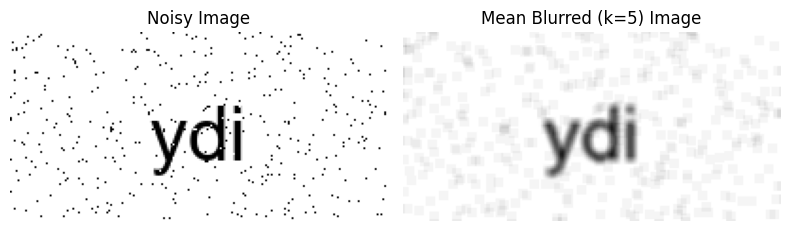

In [4]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

INPUT_DIR = "Captcha_noisy"

k = 5  # Kernel size

def mean_kernel(k):
    kernel = np.ones((k, k), np.float32) / (k * k)
    return kernel

# Generate the mean kernel
kernel = mean_kernel(k)
print(kernel)

for file in os.listdir(INPUT_DIR):
    if file.endswith(".png"):
        path = os.path.join(INPUT_DIR, file)
        img = cv2.imread(path)

        # Apply the mean kernel using filter2D
        blurred = cv2.filter2D(img, -1, kernel)

        # Compare noisy vs Mean Blurred 
        fig, axes = plt.subplots(1, 2, figsize=(8, 4))
        axes[0].imshow(img, cmap='gray')
        axes[0].set_title("Noisy Image")
        axes[0].axis("off")

        axes[1].imshow(blurred, cmap='gray')
        axes[1].set_title(f"Mean Blurred (k={k}) Image")
        axes[1].axis("off")
    
        plt.tight_layout()
        plt.show()


<p dir='rtl' style='background:#fffbe6; font-family: Vazir; border:1px dashed #f0ad4e; padding:12px; border-radius:8px; color:#111'> 
در مثال های بالا میتوانیم ببینیم که مثلا در عکس اول فیلتر میانگین باعث شده است که حروف p و q تا حدی به هم بچسبند و مرز بین آنها تا حدی خاکستری شود که این کار را در بخش segmentation سخت می کند. این کار را امتحان کردیم و باعث شد حروع p و q به عنوان یک سگمنت در نظر گرفته شوند.<br>
یا مثلا رد مثال سوم این اتفاق برای حروف های 5 , g میافتد. <br>
اما این اتفاق در فیلتر گاوسی اتفاق نیفتاد پس تصمیم می گیریم با فیلتر گاوسی جلو برویم.<br>
</p>

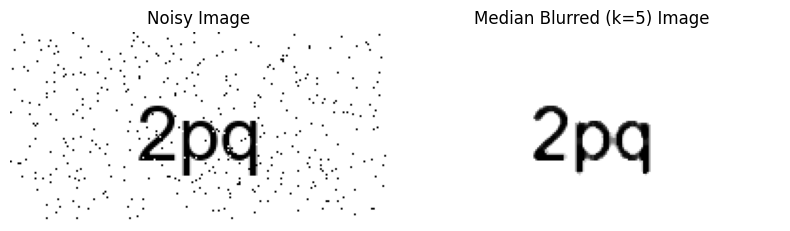

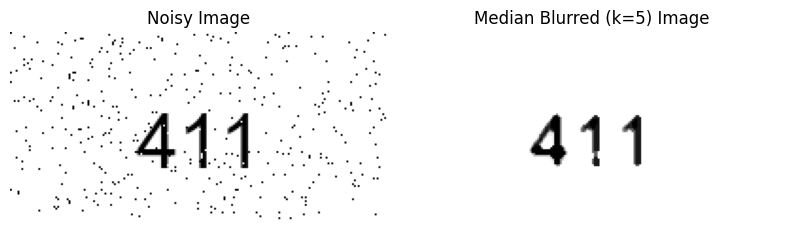

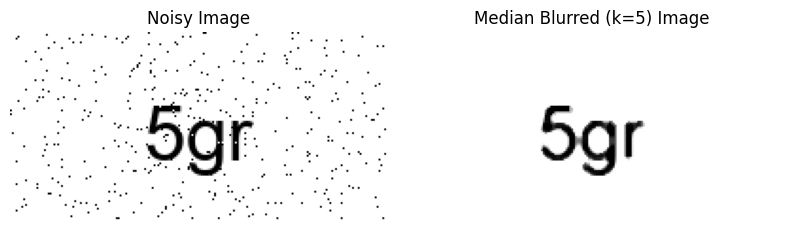

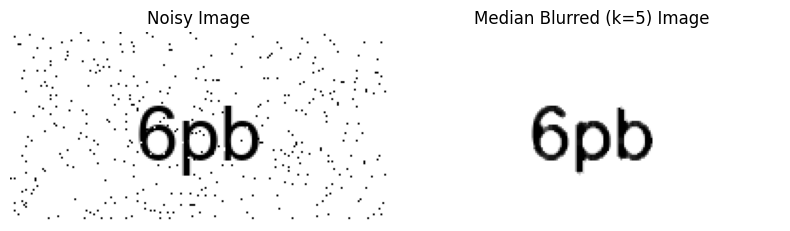

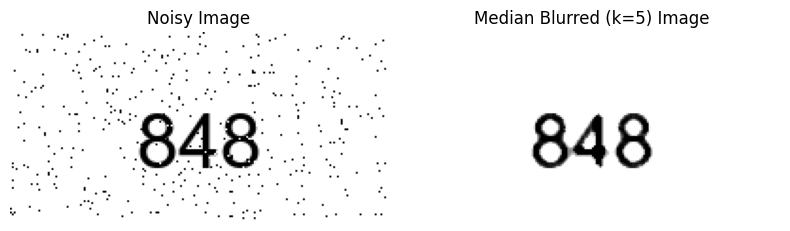

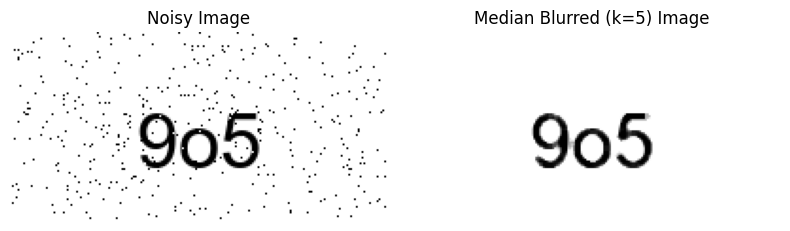

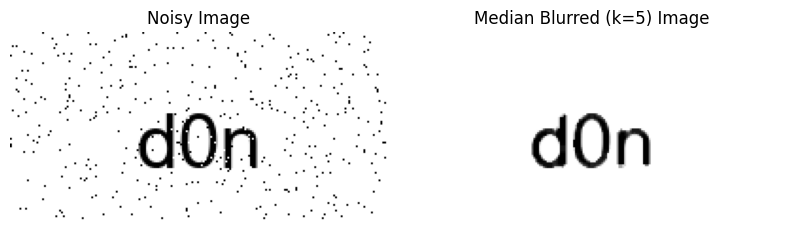

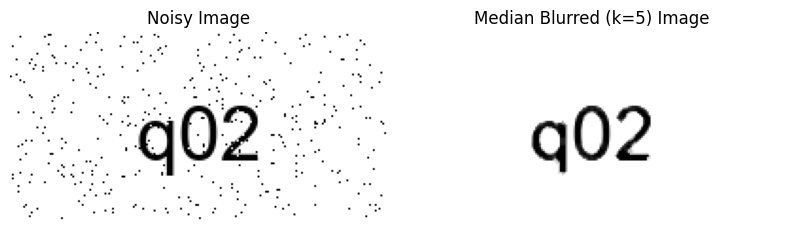

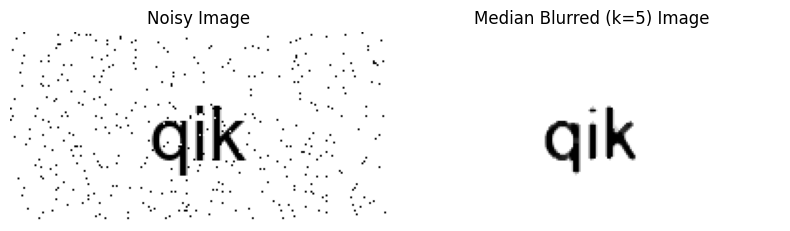

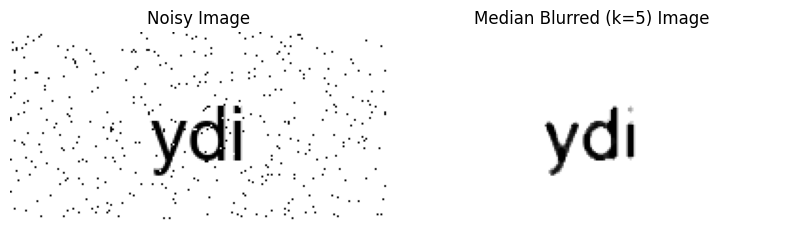

In [5]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

INPUT_DIR = "Captcha_noisy"

k = 5  # Kernel size (must be odd for median filter)

for file in os.listdir(INPUT_DIR):
    if file.endswith(".png"):
        path = os.path.join(INPUT_DIR, file)
        img = cv2.imread(path)

        # Apply the Median filter
        blurred = cv2.medianBlur(img, k)

        # Compare noisy vs Median Blurred 
        fig, axes = plt.subplots(1, 2, figsize=(8, 4))
        axes[0].imshow(img, cmap='gray')
        axes[0].set_title("Noisy Image")
        axes[0].axis("off")

        axes[1].imshow(blurred, cmap='gray')
        axes[1].set_title(f"Median Blurred (k={k}) Image")
        axes[1].axis("off")
    
        plt.tight_layout()
        plt.show()


<p dir='rtl' style='background:#fffbe6; font-family: Vazir; border:1px dashed #f0ad4e; padding:12px; border-radius:8px; color:#111'>
می توان دید که این فیلتر به خوبی توانسته است نویز تصاویر را از بین ببرد اما loss بسیاز زیادی داشته و روی مواردی مثل نقطه ی حروفی مثل i و یا چسبیدن حروف نزدیک و یا خراب کردن کلماتی که دارای گوشه هستند شده و به صرفه نیست که ساختار حروف را به هم بریزیم تا تمام نویز نمک فلفلی را پاک کنیم چرا که در ادامه با بلور کردن تصویر و روش binary توانسته ایم بدون استفاده از فیلتر میانه و loss اضافی این نویز های نمک و فلفلی را به راحتی از بین ببریم
</p>

# Second Section: Data Preprocessing

<p dir='rtl' style='background:#fffbe6; font-family: Vazir; border:1px dashed #f0ad4e; padding:12px; border-radius:8px; color:#111'> 
در پردازش تصویر، فیلترهایی که باعث تار کردن تصویر می‌شوند، قابلیت از بین بردن نویز را دارند زیرا این فیلترها به‌طور معمول با استفاده از میانگین‌گیری یا توزیع وزنی مقادیر پیکسل‌ها در ناحیه‌های اطراف هر پیکسل، نویزهای تصادفی را کاهش می‌دهند. <br> نویزها معمولاً به‌صورت تغییرات ناگهانی و تصادفی در مقدار پیکسل‌ها ظاهر می‌شوند که می‌توانند باعث ایجاد اختلال در تحلیل‌های بعدی تصویر شوند. <br> فیلترهایی مانند فیلتر گوسی و فیلتر میانه از این روش استفاده می‌کنند تا نویزهای تصادفی را با جایگزینی مقادیر ناهمخوان با مقادیر نزدیک به همسایگانشان حذف کنند. <br> به همین دلیل، استفاده از فیلترهای تارکننده در حذف نویز از تصاویر بسیار مؤثر است. <br> فیلترهای تارکننده با گرفتن میانگین یا محاسبه مقدار میانه از پیکسل‌های مجاور و جایگزین کردن پیکسل مرکزی با این مقادیر، نویزهای تصادفی را از بین می‌برند. <br> به عبارت دیگر، این فیلترها ناهنجاری‌ها یا نویزها را که به‌صورت ناگهانی در تصویر ظاهر می‌شوند، با مقادیر معمولی‌تر همسایگانشان جایگزین می‌کنند. <br> این کار باعث می‌شود که تغییرات تصادفی کاهش یابند و تصویر صاف‌تر و کمتر نویزی شود. <br> چهار نوع فیلتر تارکننده که باعث حذف نویز می‌شوند عبارتند از: <br> فیلتر گوسی که به‌طور خاص برای نویز گوسی طراحی شده است و هر پیکسل بر اساس توزیع گوسی وزن‌دهی می‌شود به این معنا که پیکسل‌های نزدیک به مرکز بیشترین وزن را دارند و پیکسل‌های دورتر وزن کمتری دارند. فیلتر گوسی باعث می‌شود که تغییرات تصادفی و شدید در مقدار پیکسل‌ها کاهش یابد زیرا مقادیر پیکسل‌ها به‌طور یکنواخت از طریق توزیع گوسی میانگین می‌شوند و تصویر صاف‌تر می‌شود. <br> فیلتر میانه بیشتر برای حذف نویز فلفل نمکی استفاده می‌شود و به جای گرفتن میانگین، از مقدار میانه پیکسل‌های همسایه استفاده می‌کند. این فیلتر باعث می‌شود که نویزهای پراکنده و شدید که ممکن است به‌صورت نقاط سیاه و سفید یا بسیار روشن ظاهر شوند، با مقادیر نرمال همسایگانشان جایگزین شوند. <br> فیلتر بلور مربعی که در این فیلتر، یک مربع یا مستطیل ثابت از پیکسل‌ها در نظر گرفته می‌شود و میانگین مقادیر پیکسل‌های داخل این مربع برای محاسبه مقدار جدید پیکسل مرکز آن استفاده می‌شود. به این ترتیب هر پیکسل جدید با مقدار میانگین پیکسل‌های اطراف آن جایگزین می‌شود و نویزهای تصادفی محو می‌شوند. <br> فیلتر گوسین بلور دو بعدی از ترکیب ویژگی‌های فضایی و شدت رنگی استفاده می‌کند و علاوه بر وزن‌دهی به فاصله پیکسل‌ها از یکدیگر، شدت رنگی پیکسل‌ها نیز در نظر گرفته می‌شود. این فیلتر باعث کاهش نویزهای گسسته در تصویر می‌شود در حالی که حاشیه‌های لبه‌ها حفظ می‌شوند و برای تصاویر با لبه‌های تیز و نویزهای رنگی مناسب است. فیلترهای تارکننده با استفاده از میانگین‌گیری یا محاسبه میانه از پیکسل‌های اطراف، نویزهای تصادفی و غیرطبیعی را کاهش می‌دهند، تصویر را نرم می‌کنند و نویزهایی که به‌طور ناگهانی و تصادفی ظاهر می‌شوند، از بین می‌برند که ما در ادامه هم از این فیلتر برای از بین بردن نویز استفاده کردیم چرا که میبینیم نتیجه ی بسیار عالی داشته و نویز را به خوبی از بین برده اند <br>
</p>

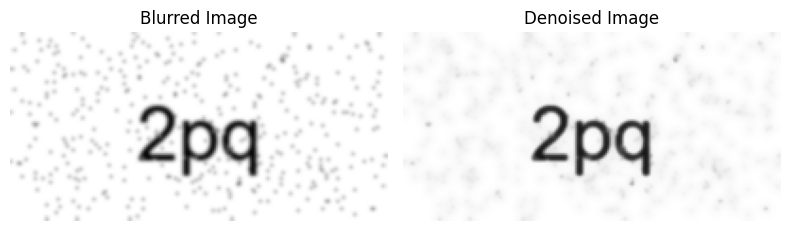

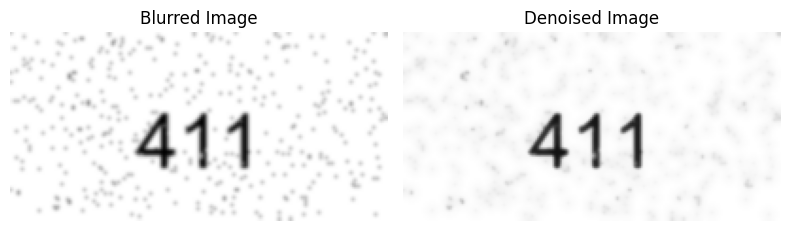

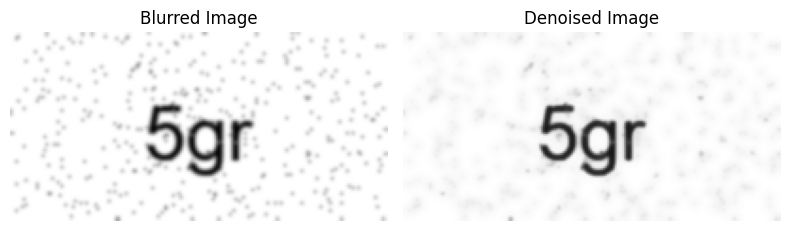

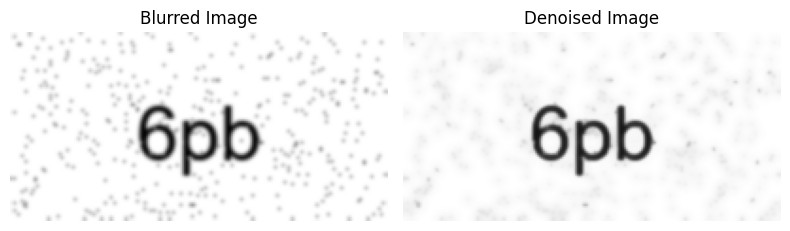

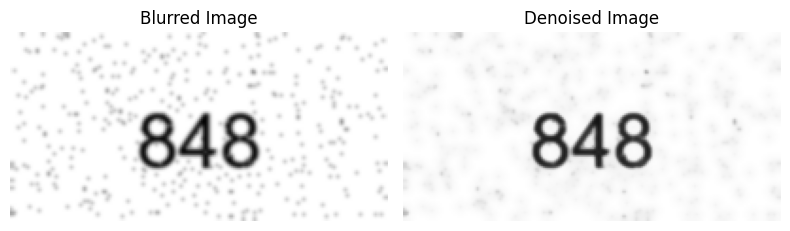

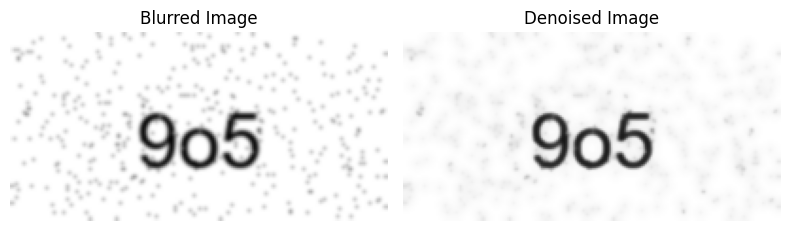

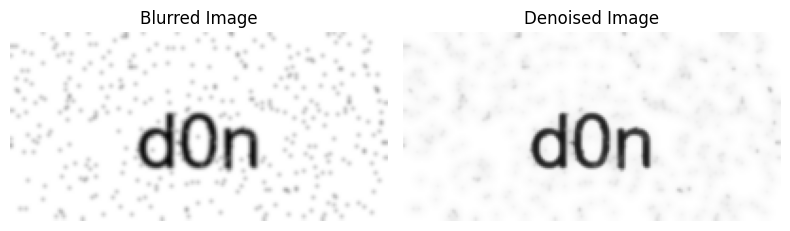

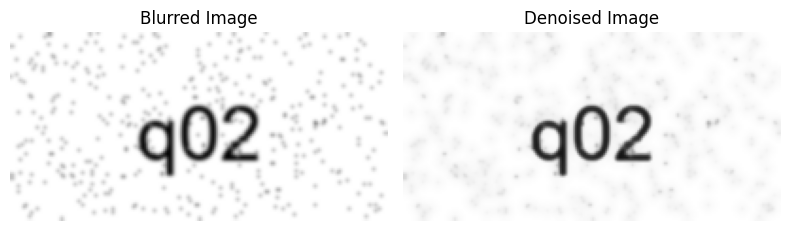

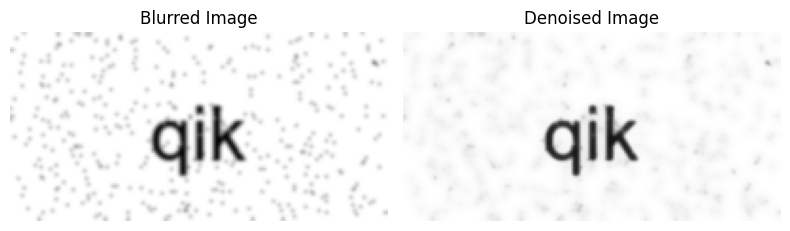

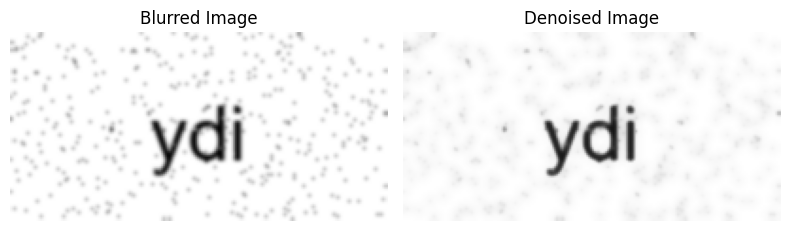

Denoised images saved in 'Captcha_denoised' folder.


In [6]:
import cv2
import os
import matplotlib.pyplot as plt

INPUT_DIR = "Captcha_blurred"
OUTPUT_DIR = "Captcha_denoised"
os.makedirs(OUTPUT_DIR, exist_ok=True)

for file in os.listdir(INPUT_DIR):
    if file.endswith(".png"):
        path = os.path.join(INPUT_DIR, file)
        img = cv2.imread(path)

        denoised = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

        # Save the denoised image
        out_path = os.path.join(OUTPUT_DIR, file)
        cv2.imwrite(out_path, denoised)

        # Compare blurred vs denoised images
        fig, axes = plt.subplots(1, 2, figsize=(8, 4))
        axes[0].imshow(img, cmap='gray')
        axes[0].set_title("Blurred Image")
        axes[0].axis("off")

        axes[1].imshow(denoised, cmap='gray')
        axes[1].set_title("Denoised Image")
        axes[1].axis("off")

        plt.tight_layout()
        plt.show()

print(f"Denoised images saved in '{OUTPUT_DIR}' folder.")


ChatGPT said:
<p dir='rtl' style='background:#fffbe6; font-family: Vazir; border:1px dashed #f0ad4e; padding:12px; border-radius:8px; color:#111'> در پردازش تصویر، دو روش مهم برای بهبود وضوح تصویر وجود دارد: Sharpening و De-blurring. هرچند هر دو باعث افزایش شفافیت می‌شوند، اما هدف و کاربرد آن‌ها متفاوت است. <br> روش Sharpening برای تقویت لبه‌ها و برجسته کردن جزئیات تصویر به‌کار می‌رود. فیلترهای شارپ با افزایش اختلاف شدت بین پیکسل مرکزی و پیکسل‌های اطراف، وضوح بصری تصویر را بالا می‌برند. در واقع این روش با شناسایی نواحی دارای تغییرات شدید در شدت روشنایی (لبه‌ها) و تقویت آن‌ها باعث می‌شود مرز اشیاء در تصویر واضح‌تر شود. <br> فیلترهای متداول شارپ‌سازی مانند لاپلاسین یا فیلتر high-pass معمولاً پس از اعمال فیلترهای Low-pass برای حذف نویز استفاده می‌شوند تا تأثیر نرم‌کنندگی فیلترهای بلور از بین برود. در این پروژه نیز پس از حذف نویز فلفل نمکی با استفاده از فیلترهای بلور، از فیلتر شارپ استفاده کردیم. این فیلتر باعث تقویت لبه‌ها و بازگرداندن وضوح از دست‌رفته در اثر بلور کردن تصویر می‌شود. <br> در مقابل، روش De-blurring برای حذف تاری ناشی از حرکت، فوکوس نادرست یا لرزش دوربین به‌کار می‌رود. در این روش ابتدا مدل تاری (PSF) تخمین زده می‌شود و سپس از روش‌هایی مانند معکوس‌سازی یا فیلتر وینر برای بازسازی تصویر اصلی استفاده می‌شود. با این حال، De-blurring معمولاً پیچیده‌تر است و برای تصاویری که واقعاً دچار تاری حرکتی هستند مناسب‌تر است. <br> در این پروژه، چون تصاویر کپچا بیشتر شامل نویز فلفل نمکی بودند و تاری حرکتی قابل توجهی نداشتند، از روش Sharpening استفاده کردیم تا ضمن حفظ جزئیات، لبه‌های حروف و اعداد واضح‌تر شوند و در مراحل بعدی مانند بخش‌بندی و تشخیص کاراکتر، دقت سیستم افزایش یابد. <br> بنابراین، انتخاب فیلتر Sharpen بهترین گزینه برای بهبود کیفیت و وضوح تصویر در این مرحله بود. <br> </p>

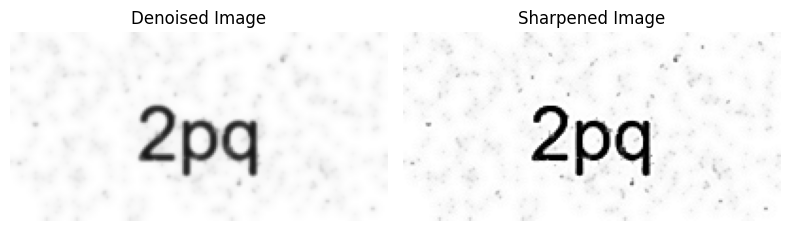

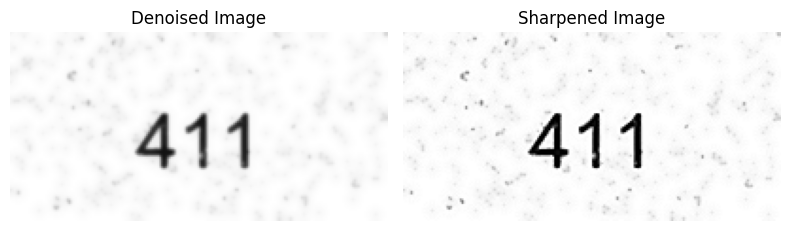

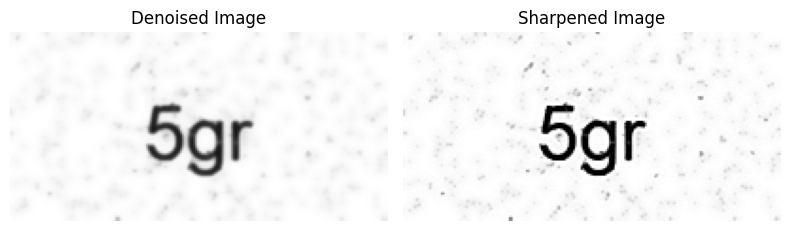

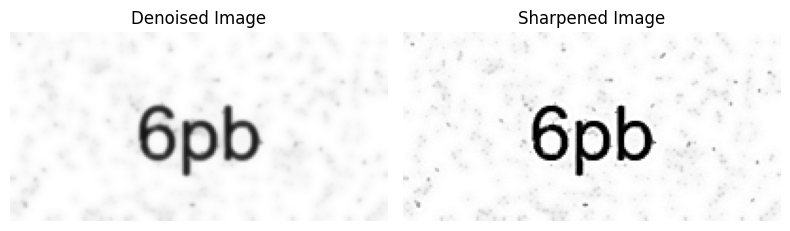

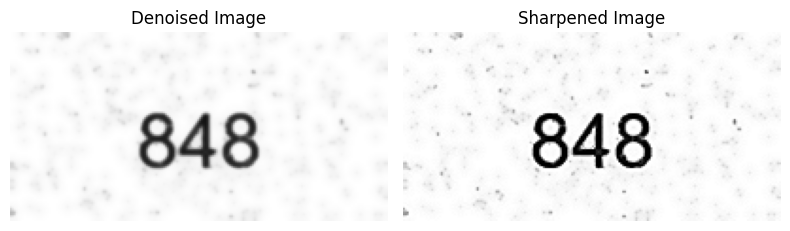

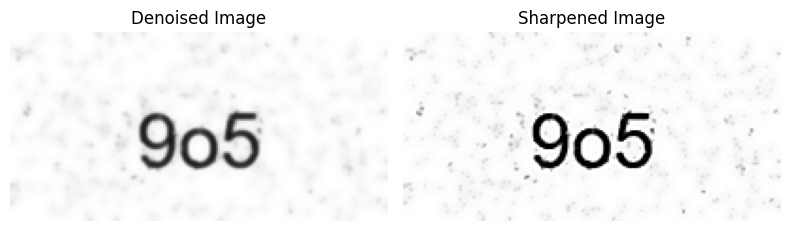

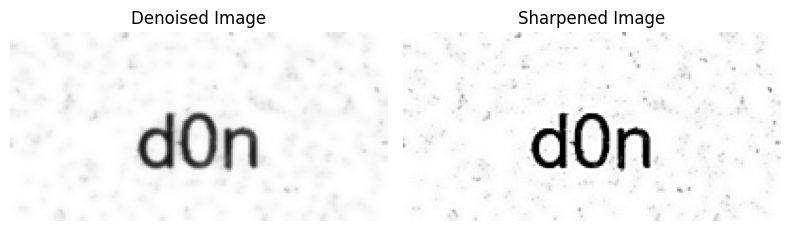

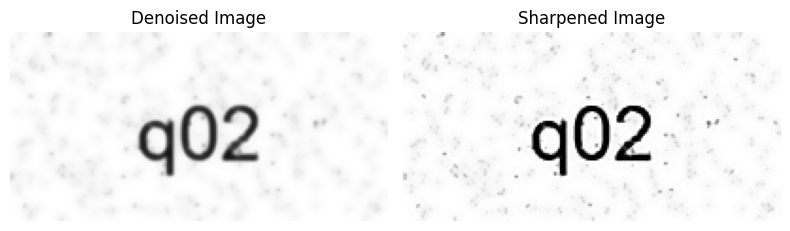

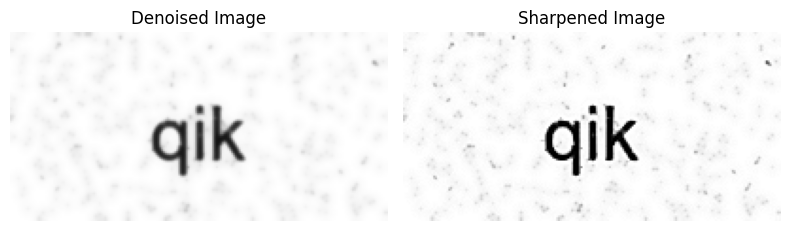

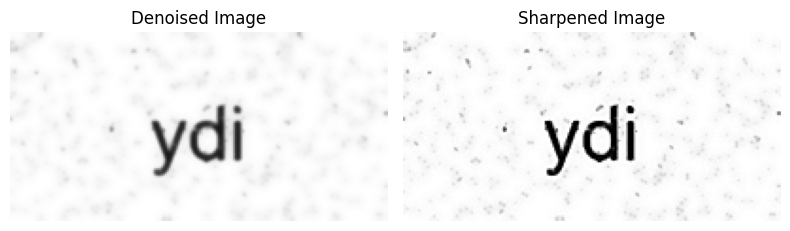

Sharpened images saved in 'Captcha_sharpened' folder.


In [8]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

INPUT_DIR = "Captcha_denoised" 
OUTPUT_DIR = "Captcha_sharpened"
os.makedirs(OUTPUT_DIR, exist_ok=True)

sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

for file in os.listdir(INPUT_DIR):
    if file.endswith(".png"):
        path = os.path.join(INPUT_DIR, file)
        img = cv2.imread(path)

        sharpened = cv2.filter2D(img, -1, sharpen_kernel)

        # Save the sharpened image
        out_path = os.path.join(OUTPUT_DIR, file)
        cv2.imwrite(out_path, sharpened)

        # Compare denoised vs sharpened images
        fig, axes = plt.subplots(1, 2, figsize=(8, 4))
        axes[0].imshow(img, cmap='gray')
        axes[0].set_title("Denoised Image")
        axes[0].axis("off")

        axes[1].imshow(sharpened, cmap='gray')
        axes[1].set_title("Sharpened Image")
        axes[1].axis("off")

        plt.tight_layout()
        plt.show()

print(f"Sharpened images saved in '{OUTPUT_DIR}' folder.")


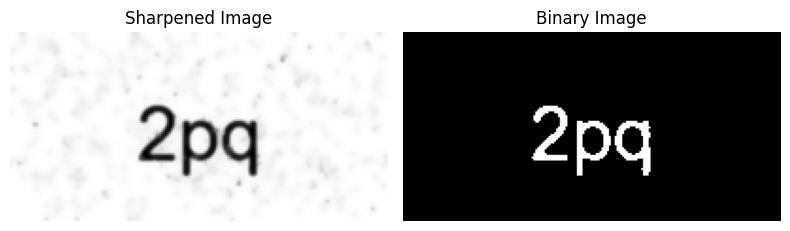

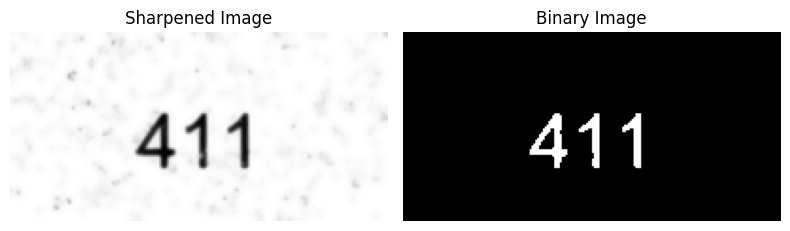

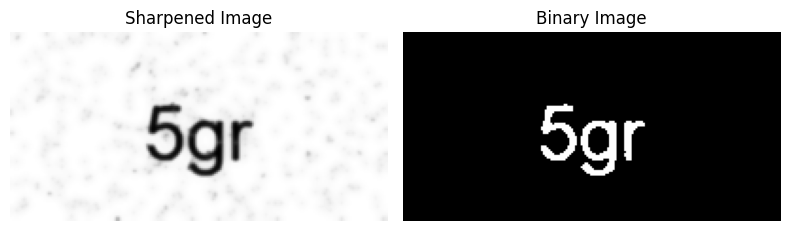

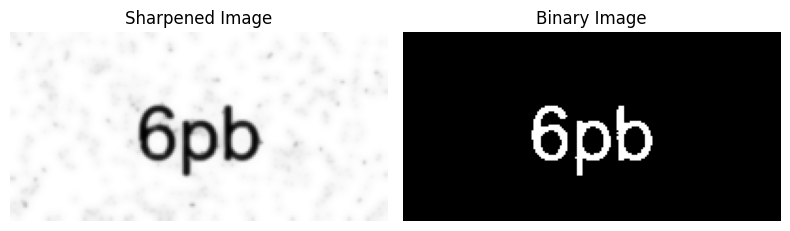

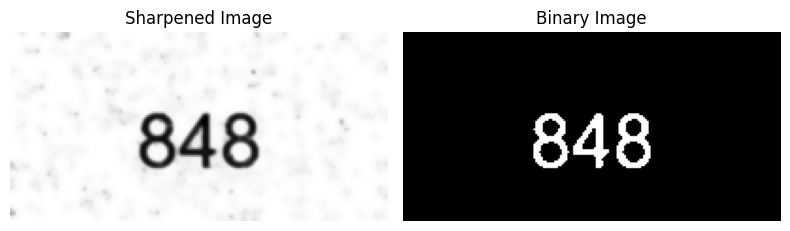

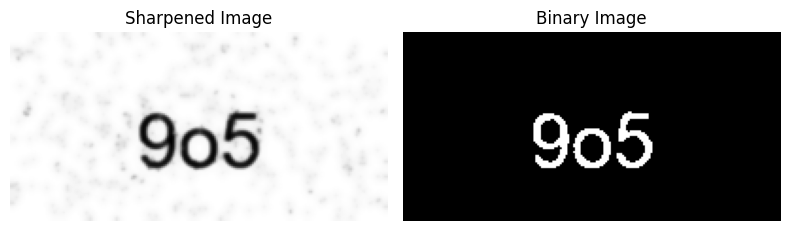

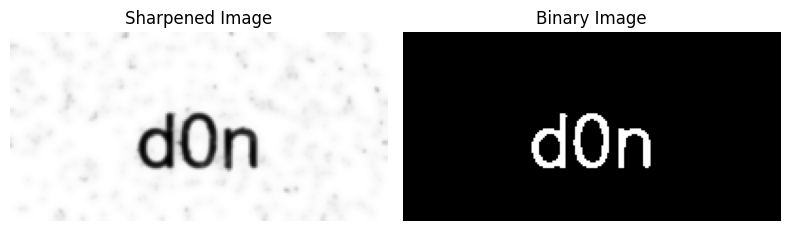

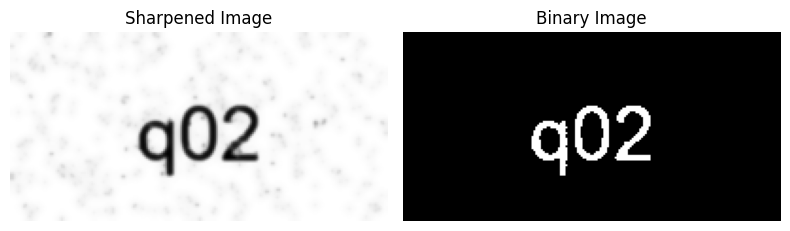

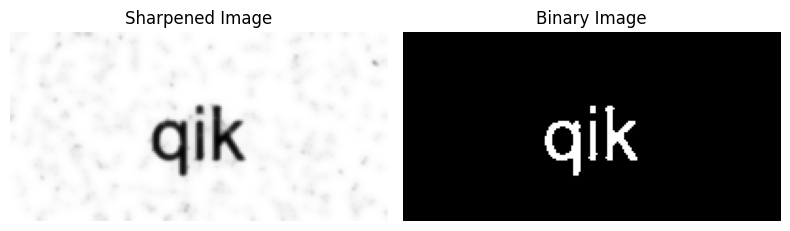

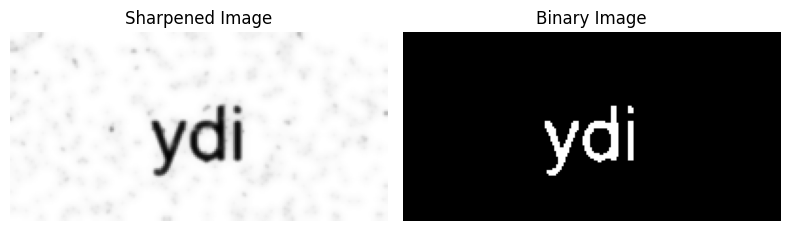

Binary images saved in 'Captcha_binary' folder.


In [9]:
import cv2
import os
import matplotlib.pyplot as plt

INPUT_DIR = "Captcha_denoised"
OUTPUT_DIR = "Captcha_binary"
os.makedirs(OUTPUT_DIR, exist_ok=True)

BINARY_THRESHOLD = 140

for file in os.listdir(INPUT_DIR):
    if file.endswith(".png"):
        path = os.path.join(INPUT_DIR, file)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

        _, binary = cv2.threshold(img, BINARY_THRESHOLD, 255, cv2.THRESH_BINARY)
        # Invert colors (so text is black, background white)
        binary = 255 - binary

        # Save the binary image
        out_path = os.path.join(OUTPUT_DIR, file)
        cv2.imwrite(out_path, binary)

        # Compare sharpened vs binary images
        fig, axes = plt.subplots(1, 2, figsize=(8, 4))
        axes[0].imshow(img, cmap='gray')
        axes[0].set_title("Sharpened Image")
        axes[0].axis("off")

        axes[1].imshow(binary, cmap='gray')
        axes[1].set_title("Binary Image")
        axes[1].axis("off")

        plt.tight_layout()
        plt.show()

print(f"Binary images saved in '{OUTPUT_DIR}' folder.")


# Third Section: segmentation

<p dir='rtl' style='background:#fffbe6; font-family: Vazir; border:1px dashed #f0ad4e; padding:12px; border-radius:8px; color:#111'> 
در ابتدا، مشکل این بود که حروفی مانند "i" و "j" که دارای نقطه هستند، به اشتباه به دو بخش جداگانه تقسیم می‌شدند و الگوریتم سگمنتیشن قادر نبود این حروف را به درستی شناسایی کند.<br>
ما به این گونه عمل می کنیم که ابتدا تمام جعبه‌های یافت شده را از چپ به راست مرتب می‌کنیم و سپس لبه‌های سمت راست جعبه‌های متوالی را با هم مقایسه می‌کنیم و در صورت نزدیک بودن، جعبه‌ها را با هم ادغام می‌کنیم تا حروف نقطه‌دار به درستی به یک سگمنت واحد تبدیل شوند. در واقع با این کار اگر نقطه ای مال یک پایه باشد با ان الگوریتم تشخیص داده می شوند و این تو سگمنت با هم ترکیب می شوند. اما چرا لبه ی سمت راست را در نظر گرفتیم ؟؟  <br>
برای مثال، در حرف "i"، نقطه بالای حرف و پایه آن به طور طبیعی در یک راستا قرار دارند و هیچ مشکلی برای شناسایی این دو به عنوان یک جعبه وجود ندارد.<br>
اما در حرف "j"، لبه سمت چپ نقطه و لبه سمت چپ پایه آن فاصله زیادی دارند و اگر از این لبه‌ها برای مقایسه استفاده کنیم، ممکن است این دو قسمت به عنوان دو جعبه جداگانه در نظر گرفته شوند، زیرا فاصله افقی زیادی بین آن‌ها وجود دارد.<br>
برای حل این مشکل، به جای مقایسه لبه‌های سمت چپ، از لبه سمت راست برای مقایسه استفاده کردیم. زیرا در حرف "j"، پایه و نقطه آن از سمت راست به هم نزدیک‌تر هستند و این روش باعث می‌شود که دو قسمت به درستی با هم ترکیب شوند و به عنوان یک جعبه واحد شناسایی شوند.<br>
به این ترتیب، با تغییر در الگوریتم مقایسه و استفاده از لبه سمت راست، توانستیم حروف نقطه‌دار مانند "i" و "j" را به درستی به عنوان یک سگمنت واحد شناسایی کرده و از اشتباهات شناسایی جلوگیری کنیم.<br>

</p>

2pq_01.png: 3 segments found


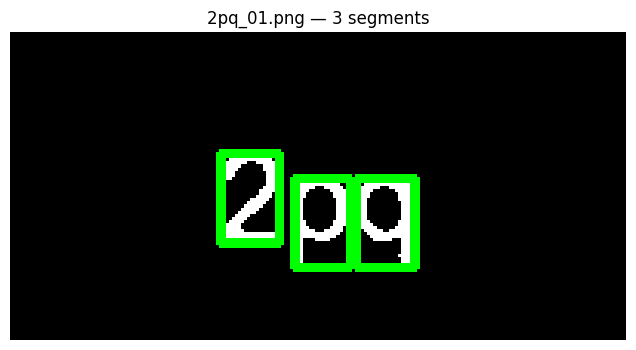

411_06.png: 3 segments found


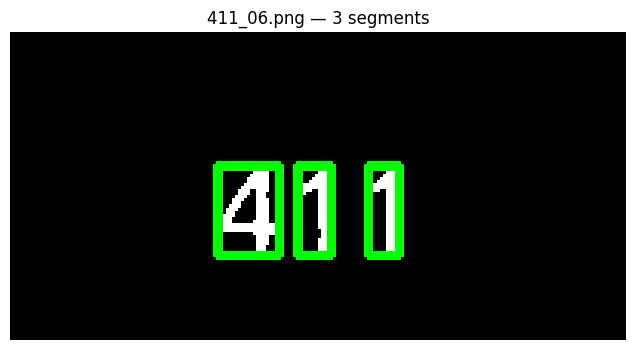

5gr_02.png: 3 segments found


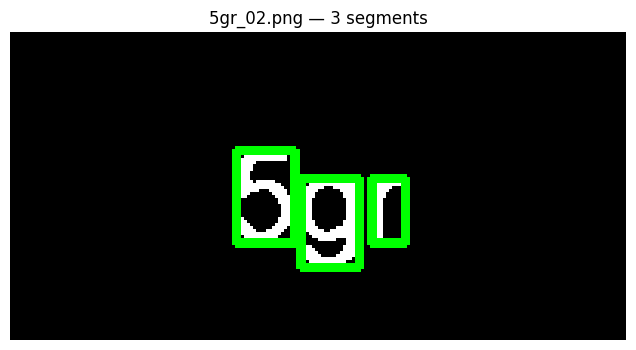

6pb_09.png: 3 segments found


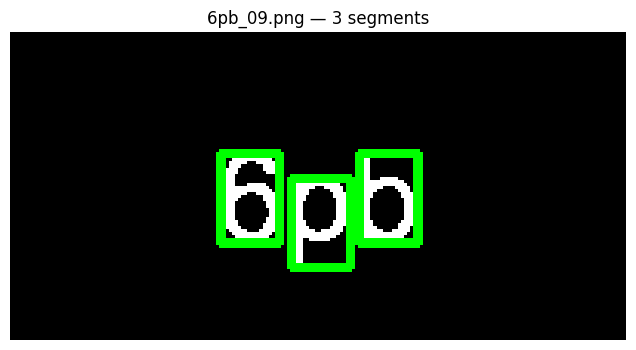

848_04.png: 3 segments found


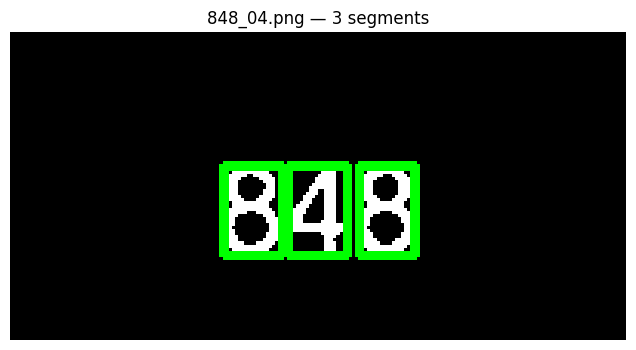

9o5_05.png: 3 segments found


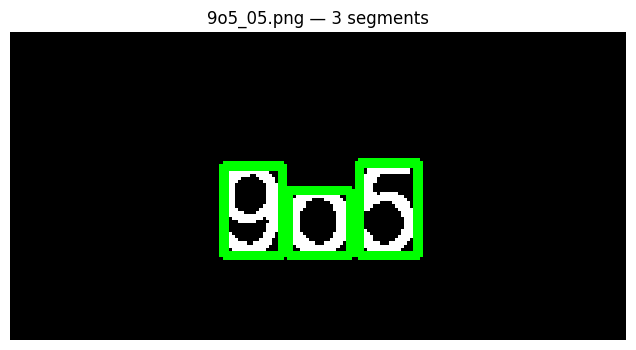

d0n_03.png: 3 segments found


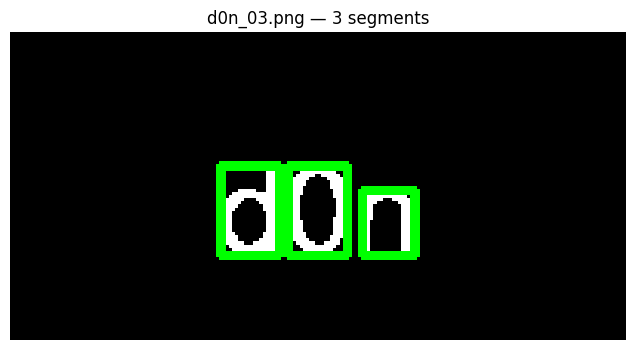

q02_00.png: 3 segments found


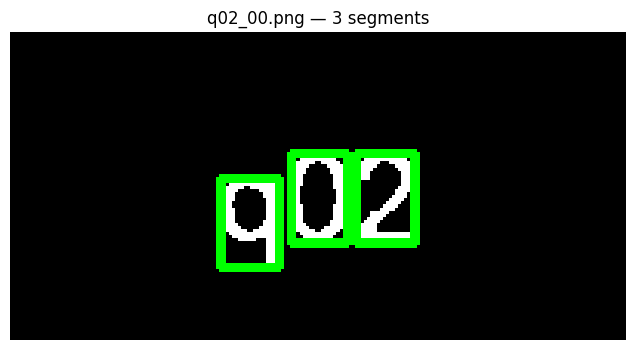

qik_08.png: 3 segments found


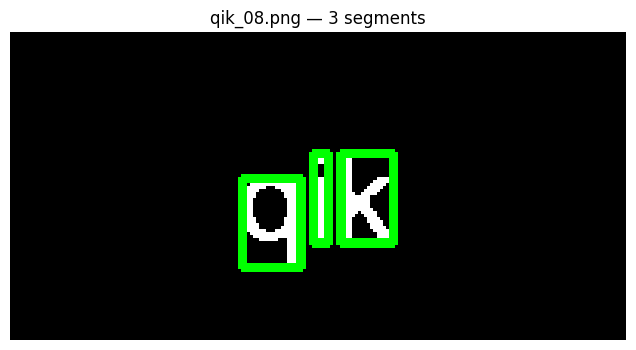

ydi_07.png: 3 segments found


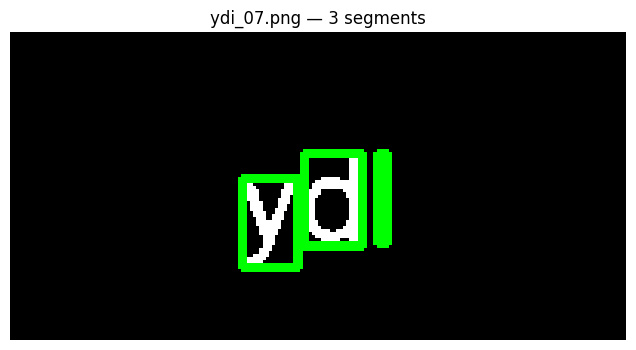

In [12]:
import cv2
import os
import matplotlib.pyplot as plt

INPUT_DIR = "Captcha_binary"
OUTPUT_DIR = "Captcha_segmented"
os.makedirs(OUTPUT_DIR, exist_ok=True)

MIN_AREA = 10
MERGE_THRESHOLD = 1  # Maximum horizontal distance to merge boxes (pixels)
RESIZE_SIZE = (64, 64)  # Output size for each segment

def find_boxes(bin_img):
    contours, _ = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    boxes = []
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        if w * h >= MIN_AREA:
            boxes.append((x, y, w, h))
    boxes.sort(key=lambda b: b[0])  # sort left to right
    return contours, boxes

def merge_bounding_boxes(boxes, threshold=MERGE_THRESHOLD):
    merged_boxes = []
    for i in range(len(boxes)):
        if not merged_boxes:
            merged_boxes.append(boxes[i])
        else:
            x1, y1, w1, h1 = merged_boxes[-1]
            x2, y2, w2, h2 = boxes[i]

            right1 = x1 + w1
            right2 = x2 + w2

            # Merge if right edges are close
            if abs(right1 - right2) <= threshold:
                new_box = (
                    min(x1, x2),
                    min(y1, y2),
                    max(x1 + w1, x2 + w2) - min(x1, x2),
                    max(y1 + h1, y2 + h2) - min(y1, y2)
                )
                merged_boxes[-1] = new_box
            else:
                merged_boxes.append(boxes[i])
    return merged_boxes

for file in os.listdir(INPUT_DIR):
    path = os.path.join(INPUT_DIR, file)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    contours, boxes = find_boxes(img)
    merged_boxes = merge_bounding_boxes(boxes, threshold=MERGE_THRESHOLD)

    # Draw green bounding boxes on a copy
    display = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    for (x, y, w, h) in merged_boxes:
        cv2.rectangle(display, (x, y), (x + w, y + h), (0, 255, 0), 2)

    print(f"{file}: {len(merged_boxes)} segments found")

    # Create subfolder for this image
    image_name = os.path.splitext(file)[0]
    image_output_folder = os.path.join(OUTPUT_DIR, image_name)
    os.makedirs(image_output_folder, exist_ok=True)

    # Extract, resize, and save each segment
    for i, (x, y, w, h) in enumerate(merged_boxes, start=1):
        segment = img[y:y+h, x:x+w]
        resized = cv2.resize(segment, RESIZE_SIZE, interpolation=cv2.INTER_AREA)
        _, binary_resized = cv2.threshold(resized, 127, 255, cv2.THRESH_BINARY)
        cv2.imwrite(os.path.join(image_output_folder, f"{image_name}_{i}.png"), binary_resized)

    # Show result
    plt.figure(figsize=(8, 4))
    plt.imshow(cv2.cvtColor(display, cv2.COLOR_BGR2RGB))
    plt.title(f"{file} — {len(merged_boxes)} segments")
    plt.axis("off")
    plt.show()


# Fourth Section: Character Recognition

In [13]:
import cv2
import os
import numpy as np
import csv
from operator import itemgetter

SEGMENTED_DIR = "Captcha_segmented"   # Each subfolder contains 3 segments (64x64)
MAPSET_DIR = "Mapset"                 # Each file: <label>.png
CSV_OUTPUT = "captcha_results.csv"    # Output CSV file

# Load all Mapset reference images
mapset = {}
for file in os.listdir(MAPSET_DIR):
    if file.lower().endswith(".png"):
        label = os.path.splitext(file)[0]
        path = os.path.join(MAPSET_DIR, file)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))  # ensure same size
        mapset[label] = img

def correlation(img1, img2):
    img1 = img1.astype(np.float32)
    img2 = img2.astype(np.float32)
    mean1, mean2 = np.mean(img1), np.mean(img2)
    num = np.sum((img1 - mean1) * (img2 - mean2))
    den = np.sqrt(np.sum((img1 - mean1) ** 2) * np.sum((img2 - mean2) ** 2))
    return num / den if den != 0 else 0

# Open CSV for writing
with open(CSV_OUTPUT, mode="w", newline="", encoding="utf-8") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["segment_file", "predicted_label", "correlation"])

    # Iterate over captcha folders
    for folder in sorted(os.listdir(SEGMENTED_DIR)):
        folder_path = os.path.join(SEGMENTED_DIR, folder)
        if not os.path.isdir(folder_path):
            continue

        segment_files = sorted(
            [f for f in os.listdir(folder_path) if f.lower().endswith(".png")]
        )

        predicted_text = ""
        print(f"\n===== Captcha Image: {folder} =====")

        # For each segment in this captcha
        for seg_file in segment_files:
            seg_path = os.path.join(folder_path, seg_file)
            segment = cv2.imread(seg_path, cv2.IMREAD_GRAYSCALE)
            correlations = []
            for label, ref_img in mapset.items():
                corr = correlation(segment, ref_img)
                correlations.append((label, corr))

            # Sort correlations descending
            correlations.sort(key=itemgetter(1), reverse=True)

            best_label, best_corr = correlations[0]
            predicted_text += best_label

            # Print top-5 table for this segment
            print(f"\nSegment: {seg_file}")
            print(f"{'Rank':<5} {'Letter':<6} {'Correlation':<10}")
            for rank, (label, corr) in enumerate(correlations[:5], start=1):
                print(f"{rank:<5} {label:<6} {corr:<10.4f}")

            # Write to CSV
            writer.writerow([seg_file, best_label, f"{best_corr:.4f}"])

        print(f"\nPredicted CAPTCHA: {predicted_text}")

print(f"\nResults saved to {CSV_OUTPUT}")



===== Captcha Image: 2pq_01 =====

Segment: 2pq_01_1.png
Rank  Letter Correlation
1     2      0.7215    
2     z      0.2758    
3     3      0.2420    
4     7      0.2153    
5     9      0.2015    

Segment: 2pq_01_2.png
Rank  Letter Correlation
1     p      0.6645    
2     n      0.3488    
3     q      0.2927    
4     m      0.2758    
5     o      0.1920    

Segment: 2pq_01_3.png
Rank  Letter Correlation
1     q      0.6914    
2     p      0.3060    
3     n      0.2984    
4     0      0.2441    
5     1      0.2400    

Predicted CAPTCHA: 2pq

===== Captcha Image: 411_06 =====

Segment: 411_06_1.png
Rank  Letter Correlation
1     4      0.7136    
2     1      0.2305    
3     d      0.1848    
4     j      0.1691    
5     i      0.1616    

Segment: 411_06_2.png
Rank  Letter Correlation
1     1      0.7972    
2     q      0.4018    
3     n      0.3120    
4     d      0.2581    
5     u      0.1814    

Segment: 411_06_3.png
Rank  Letter Correlation
1     1      0.879

<p dir='rtl' style='background:#fffbe6; font-family: Vazir; border:1px dashed #f0ad4e; padding:12px; border-radius:8px; color:#111'> 
هنگام محاسبه ی correlation برای حرف g با تمامی حروف mapset این حرف با q بیشترین correlation را دارد که دلیل ان هم این است که حرف g که داخل mapset وجود دارد شکل متفاوتی با g نوشتاری دارد و همین باعث شد که این حرف با q اشتباه گرفته شود.<br>
</p>